In [ ]:
Ref: https://www.kaggle.com/c/facial-keypoints-detection/discussion
Ref: http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/
Data: https://www.kaggle.com/c/facial-keypoints-detection/data        

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.models import model_from_json
import seaborn as sns
sns.set_style('whitegrid')

# X will be the image, y will be series of plots.
# We have to predict series of plots for every image

In [2]:
FTRAIN = 'data/training.csv'
FTEST='data/test.csv'

In [87]:
def load(test=False,cols=None):
    fname = FTEST if test else FTRAIN
    df = pd.read_csv(os.path.expanduser(fname)) #load pandas data frame
    
    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda i:np.fromstring(i, sep=' '))
    
    if cols:
        df = df[list(cols)+['Image']]
    
    print (df.count())
    df=df.dropna()
    
    
    X=np.vstack(df['Image'].values)/255.
    
    X=X.astype(np.float32)
    
    if not test:
        y = df[df.columns[:-1]].values
        
        y= (y-48)/48
       
        X,y=shuffle(X,y,random_state=42)
        y=y.astype(np.float32)
        
    else:
        y=None
    
   
    return X,y 
        

In [88]:
def load2d(test=False, cols=None):
    
    X, y = load(test, cols)
    X = X.reshape(-1,96,96,1)
    
    return X, y


In [83]:
# X, y = load()
# print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
#     X.shape, X.min(), X.max()))
# print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
#     y.shape, y.min(), y.max()))

In [89]:
X,y = load2d(test = False)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [94]:
def cnn_model():
    model = Sequential()
    
    #inputs = Input(shape=(96, 96, 1))
    model.add(Convolution2D(32,(3,3),input_shape=(96,96,1)))
    #model.add(Convolution2D(32, 3, 3, subsample=(2, 2), border_mode='valid', dim_ordering='tf')(inputs))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Convolution2D(64,2,2))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
            
    model.add(Convolution2D(128,2,2))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) 
              
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dense(30)) 
           
    return model
    
model = cnn_model()
sgd = SGD(lr=0.01,momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd)
hist=model.fit(X,y,nb_epoch=10,validation_split=0.2)
              
    
    

/home/nj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2))`
/home/nj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2))`
/home/nj/anaconda3/lib/python3.5/site-packages/keras/models.py:850: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1712 samples, validate on 428 samples
Epoch 1/10
1712/1712 [==============================] - 3s - loss: 0.0382 - val_loss: 0.0066
Epoch 2/10
1712/1712 [==============================] - 3s - loss: 0.0064 - val_loss: 0.0058
Epoch 3/10
1712/1712 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0053
Epoch 4/10
1712/1712 [==============================] - 3s - loss: 0.0054 - val_loss: 0.0051
Epoch 5/10
1712/1712 [==============================] - 3s - loss: 0.0051 - val_loss: 0.0049
Epoch 6/10
1712/1712 [==============================] - 3s - loss: 0.0049 - val_loss: 0.0047
Epoch 7/10
1712/1712 [==============================] - 3s - loss: 0.0048 - val_loss: 0.0046
Epoch 8/10
1712/1712 [==============================] - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 9/10
1712/1712 [==============================] - 3s - loss: 0.0046 - val_loss: 0.0045
Epoch 10/10
1712/1712 [==============================] - 3s - loss: 0.0045 - val_loss: 0.0045


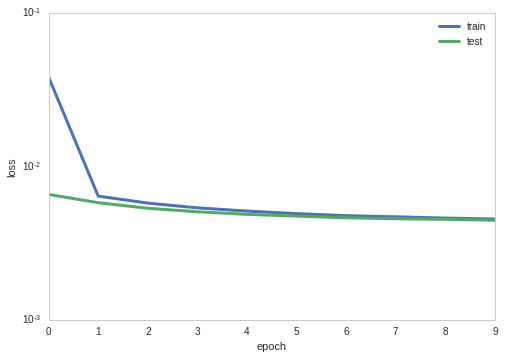

In [95]:
f=plt.figure()
plt.plot(hist.history['loss'],linewidth=3,label='train')
plt.plot(hist.history['val_loss'],linewidth=3,label='test')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()
f.savefig('./loss.png')


In [96]:
#predict test_images
X_test,_=load2d(test=True)
y_test=model.predict(X_test)


ImageId    1783
Image      1783
dtype: int64


In [135]:
def plot_sample(x, y, axis):
    
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='x', s=10)

In [140]:
def plot_sample1(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    print (y[0::2])
    print (y[0::2]*48+48)
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='x', s=10)

[ 0.37786633 -0.37702319  0.24123719  0.52999866 -0.23962867 -0.5330357
  0.16857761  0.65577155 -0.17974702 -0.66732395  0.0052368   0.32210249
 -0.30398992  0.00316982  0.00281675]
[ 66.1375885   29.90288734  59.57938385  73.43993378  36.49782562
  22.41428757  56.0917244   79.47703552  39.37214279  15.96845245
  48.25136566  63.46091843  33.40848541  48.15215302  48.13520432]


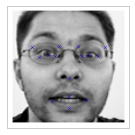

In [141]:
fig = plt.figure(figsize=(10,10))
for i in range(1):
    axis=fig.add_subplot(4,4,i+1,xticks=[],yticks=[])
    plot_sample1(X_test[i],y_test[i],axis)
plt.show()


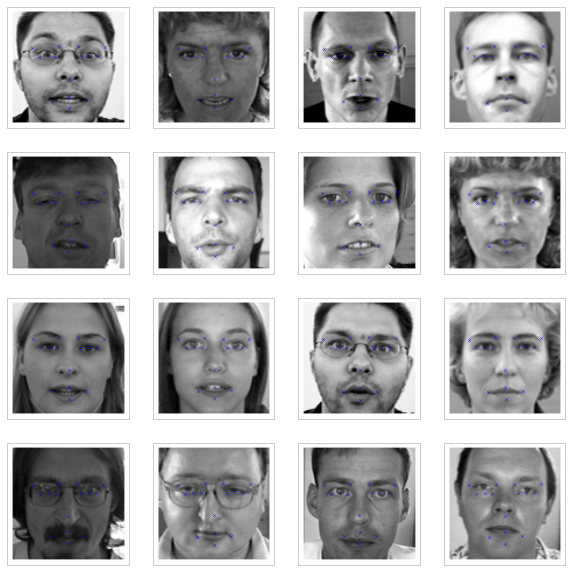

In [120]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    axis=fig.add_subplot(4,4,i+1,xticks=[],yticks=[])
    plot_sample(X_test[i],y_test[i],axis)
plt.show()